## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  65.030901  1252.996515  0.155486   3.488734  1.380786
1  47.510738  1451.438974  0.264329   8.159302  1.304904
2  58.836002  1595.171538  0.907671  10.803557  1.451543
3  86.709838  1319.069744  0.120173   1.899865  1.202638
4  71.678988   900.520901  0.491483   2.099686  1.521675


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.27552 | train_mse: 5.35287 | train_mae: 1.72018 |  0:00:00s
epoch 1  | loss: 1.04534 | train_mse: 4.0611  | train_mae: 1.51354 |  0:00:00s


epoch 2  | loss: 0.99728 | train_mse: 3.2784  | train_mae: 1.39527 |  0:00:00s
epoch 3  | loss: 0.97285 | train_mse: 2.80922 | train_mae: 1.30113 |  0:00:00s


epoch 4  | loss: 0.91419 | train_mse: 2.48189 | train_mae: 1.21026 |  0:00:00s
epoch 5  | loss: 0.93503 | train_mse: 2.11183 | train_mae: 1.12679 |  0:00:00s


epoch 6  | loss: 0.91403 | train_mse: 1.89967 | train_mae: 1.07106 |  0:00:01s
epoch 7  | loss: 0.81559 | train_mse: 1.58629 | train_mae: 0.98778 |  0:00:01s


epoch 8  | loss: 0.78315 | train_mse: 1.39626 | train_mae: 0.92701 |  0:00:01s


epoch 9  | loss: 0.70877 | train_mse: 1.28608 | train_mae: 0.89941 |  0:00:01s


epoch 10 | loss: 0.69735 | train_mse: 1.17587 | train_mae: 0.8558  |  0:00:01s


epoch 11 | loss: 0.77845 | train_mse: 1.10011 | train_mae: 0.82792 |  0:00:02s
epoch 12 | loss: 0.66053 | train_mse: 1.06077 | train_mae: 0.81047 |  0:00:02s


epoch 13 | loss: 0.6146  | train_mse: 1.00091 | train_mae: 0.77736 |  0:00:02s


epoch 14 | loss: 0.57284 | train_mse: 0.90129 | train_mae: 0.73601 |  0:00:03s


epoch 15 | loss: 0.6342  | train_mse: 0.84887 | train_mae: 0.71445 |  0:00:03s


epoch 16 | loss: 0.4792  | train_mse: 0.7914  | train_mae: 0.68821 |  0:00:04s


epoch 17 | loss: 0.53448 | train_mse: 0.7329  | train_mae: 0.66006 |  0:00:04s


epoch 18 | loss: 0.47522 | train_mse: 0.68988 | train_mae: 0.63827 |  0:00:05s


epoch 19 | loss: 0.46537 | train_mse: 0.64944 | train_mae: 0.62096 |  0:00:05s


epoch 20 | loss: 0.54572 | train_mse: 0.61681 | train_mae: 0.60731 |  0:00:06s


epoch 21 | loss: 0.4349  | train_mse: 0.59216 | train_mae: 0.60013 |  0:00:06s


epoch 22 | loss: 0.44341 | train_mse: 0.56983 | train_mae: 0.59198 |  0:00:06s


epoch 23 | loss: 0.61434 | train_mse: 0.55362 | train_mae: 0.58494 |  0:00:07s


epoch 24 | loss: 0.5619  | train_mse: 0.53524 | train_mae: 0.57913 |  0:00:07s
epoch 25 | loss: 0.77181 | train_mse: 0.50846 | train_mae: 0.56219 |  0:00:07s


epoch 26 | loss: 0.50772 | train_mse: 0.50338 | train_mae: 0.56524 |  0:00:07s


epoch 27 | loss: 0.57361 | train_mse: 0.49113 | train_mae: 0.56135 |  0:00:07s


epoch 28 | loss: 0.30773 | train_mse: 0.47397 | train_mae: 0.55343 |  0:00:08s


epoch 29 | loss: 0.56876 | train_mse: 0.45926 | train_mae: 0.5457  |  0:00:08s


epoch 30 | loss: 0.40415 | train_mse: 0.44194 | train_mae: 0.53578 |  0:00:08s


epoch 31 | loss: 0.32626 | train_mse: 0.42311 | train_mae: 0.5232  |  0:00:09s


epoch 32 | loss: 0.49969 | train_mse: 0.40753 | train_mae: 0.51272 |  0:00:09s


epoch 33 | loss: 0.44647 | train_mse: 0.39228 | train_mae: 0.50093 |  0:00:09s
epoch 34 | loss: 0.47496 | train_mse: 0.38408 | train_mae: 0.49682 |  0:00:10s


epoch 35 | loss: 0.3608  | train_mse: 0.37044 | train_mae: 0.48439 |  0:00:10s


epoch 36 | loss: 0.34682 | train_mse: 0.35975 | train_mae: 0.47846 |  0:00:10s


epoch 37 | loss: 0.43541 | train_mse: 0.3456  | train_mae: 0.46691 |  0:00:11s
epoch 38 | loss: 0.32722 | train_mse: 0.33839 | train_mae: 0.46317 |  0:00:11s


epoch 39 | loss: 0.47295 | train_mse: 0.32221 | train_mae: 0.45205 |  0:00:11s


epoch 40 | loss: 0.38224 | train_mse: 0.31861 | train_mae: 0.44564 |  0:00:11s


epoch 41 | loss: 0.54961 | train_mse: 0.30489 | train_mae: 0.4343  |  0:00:12s


epoch 42 | loss: 0.53547 | train_mse: 0.30087 | train_mae: 0.42811 |  0:00:12s


epoch 43 | loss: 0.38108 | train_mse: 0.29017 | train_mae: 0.42054 |  0:00:12s


epoch 44 | loss: 0.46491 | train_mse: 0.28199 | train_mae: 0.41432 |  0:00:13s


epoch 45 | loss: 0.48477 | train_mse: 0.2745  | train_mae: 0.40906 |  0:00:14s


epoch 46 | loss: 0.36929 | train_mse: 0.26818 | train_mae: 0.40695 |  0:00:14s


epoch 47 | loss: 0.37886 | train_mse: 0.25638 | train_mae: 0.40114 |  0:00:14s


epoch 48 | loss: 0.33979 | train_mse: 0.24525 | train_mae: 0.39492 |  0:00:15s


epoch 49 | loss: 0.46507 | train_mse: 0.23714 | train_mae: 0.38873 |  0:00:15s


epoch 50 | loss: 0.2529  | train_mse: 0.22762 | train_mae: 0.38028 |  0:00:16s


epoch 51 | loss: 0.32986 | train_mse: 0.22182 | train_mae: 0.37537 |  0:00:16s


epoch 52 | loss: 0.28373 | train_mse: 0.21946 | train_mae: 0.37302 |  0:00:16s


epoch 53 | loss: 0.26928 | train_mse: 0.21837 | train_mae: 0.37046 |  0:00:17s


epoch 54 | loss: 0.34467 | train_mse: 0.21898 | train_mae: 0.37139 |  0:00:17s


epoch 55 | loss: 0.38482 | train_mse: 0.21685 | train_mae: 0.37018 |  0:00:17s


epoch 56 | loss: 0.3127  | train_mse: 0.21498 | train_mae: 0.36779 |  0:00:18s
epoch 57 | loss: 0.43778 | train_mse: 0.21591 | train_mae: 0.36801 |  0:00:18s


epoch 58 | loss: 0.44342 | train_mse: 0.21583 | train_mae: 0.36449 |  0:00:18s


epoch 59 | loss: 0.42201 | train_mse: 0.21657 | train_mae: 0.36085 |  0:00:19s


epoch 60 | loss: 0.39691 | train_mse: 0.21984 | train_mae: 0.36085 |  0:00:19s


epoch 61 | loss: 0.28703 | train_mse: 0.21915 | train_mae: 0.36068 |  0:00:20s


epoch 62 | loss: 0.33928 | train_mse: 0.21768 | train_mae: 0.36203 |  0:00:20s


epoch 63 | loss: 0.25231 | train_mse: 0.21162 | train_mae: 0.35998 |  0:00:20s


epoch 64 | loss: 0.33789 | train_mse: 0.20354 | train_mae: 0.35371 |  0:00:21s


epoch 65 | loss: 0.28384 | train_mse: 0.21328 | train_mae: 0.36143 |  0:00:21s


epoch 66 | loss: 0.31797 | train_mse: 0.21343 | train_mae: 0.36298 |  0:00:21s
epoch 67 | loss: 0.29305 | train_mse: 0.20968 | train_mae: 0.36068 |  0:00:21s


epoch 68 | loss: 0.4463  | train_mse: 0.20431 | train_mae: 0.35714 |  0:00:21s
epoch 69 | loss: 0.54139 | train_mse: 0.20157 | train_mae: 0.35469 |  0:00:21s


epoch 70 | loss: 0.19352 | train_mse: 0.20055 | train_mae: 0.35145 |  0:00:22s


epoch 71 | loss: 0.26568 | train_mse: 0.19748 | train_mae: 0.348   |  0:00:22s


epoch 72 | loss: 0.29928 | train_mse: 0.1921  | train_mae: 0.34328 |  0:00:22s


epoch 73 | loss: 0.21573 | train_mse: 0.18783 | train_mae: 0.34103 |  0:00:23s


epoch 74 | loss: 0.33184 | train_mse: 0.18404 | train_mae: 0.33796 |  0:00:23s


epoch 75 | loss: 0.32638 | train_mse: 0.18168 | train_mae: 0.33625 |  0:00:24s


epoch 76 | loss: 0.48787 | train_mse: 0.18158 | train_mae: 0.33731 |  0:00:24s
epoch 77 | loss: 0.30896 | train_mse: 0.18172 | train_mae: 0.33755 |  0:00:25s


epoch 78 | loss: 0.22429 | train_mse: 0.18087 | train_mae: 0.33733 |  0:00:25s
epoch 79 | loss: 0.21584 | train_mse: 0.17922 | train_mae: 0.33572 |  0:00:25s


epoch 80 | loss: 0.28614 | train_mse: 0.17429 | train_mae: 0.33168 |  0:00:25s


epoch 81 | loss: 0.30402 | train_mse: 0.17148 | train_mae: 0.32778 |  0:00:25s
epoch 82 | loss: 0.44546 | train_mse: 0.17114 | train_mae: 0.3252  |  0:00:26s


epoch 83 | loss: 0.3541  | train_mse: 0.1714  | train_mae: 0.3249  |  0:00:26s
epoch 84 | loss: 0.27102 | train_mse: 0.17185 | train_mae: 0.32782 |  0:00:26s


epoch 85 | loss: 0.35016 | train_mse: 0.17424 | train_mae: 0.3305  |  0:00:26s
epoch 86 | loss: 0.27356 | train_mse: 0.17412 | train_mae: 0.33287 |  0:00:26s


epoch 87 | loss: 0.25055 | train_mse: 0.17139 | train_mae: 0.33083 |  0:00:26s


epoch 88 | loss: 0.27551 | train_mse: 0.16696 | train_mae: 0.32493 |  0:00:27s


epoch 89 | loss: 0.18617 | train_mse: 0.16471 | train_mae: 0.31992 |  0:00:27s
epoch 90 | loss: 0.2672  | train_mse: 0.16425 | train_mae: 0.32098 |  0:00:27s


epoch 91 | loss: 0.36105 | train_mse: 0.16524 | train_mae: 0.32266 |  0:00:28s
epoch 92 | loss: 0.31421 | train_mse: 0.17083 | train_mae: 0.32662 |  0:00:28s


epoch 93 | loss: 0.31673 | train_mse: 0.17439 | train_mae: 0.32688 |  0:00:28s
epoch 94 | loss: 0.30232 | train_mse: 0.17263 | train_mae: 0.32426 |  0:00:28s


epoch 95 | loss: 0.23621 | train_mse: 0.17138 | train_mae: 0.32377 |  0:00:28s
epoch 96 | loss: 0.32755 | train_mse: 0.16789 | train_mae: 0.3208  |  0:00:29s


epoch 97 | loss: 0.37011 | train_mse: 0.15652 | train_mae: 0.31032 |  0:00:29s


epoch 98 | loss: 0.27501 | train_mse: 0.1559  | train_mae: 0.31223 |  0:00:29s


epoch 99 | loss: 0.19515 | train_mse: 0.15503 | train_mae: 0.31265 |  0:00:29s
epoch 100| loss: 0.24908 | train_mse: 0.15082 | train_mae: 0.3049  |  0:00:30s


epoch 101| loss: 0.23125 | train_mse: 0.15044 | train_mae: 0.30396 |  0:00:30s
epoch 102| loss: 0.26017 | train_mse: 0.15077 | train_mae: 0.30272 |  0:00:30s
epoch 103| loss: 0.2643  | train_mse: 0.15178 | train_mae: 0.30763 |  0:00:30s


epoch 104| loss: 0.19343 | train_mse: 0.15965 | train_mae: 0.31064 |  0:00:30s
epoch 105| loss: 0.26651 | train_mse: 0.18247 | train_mae: 0.32113 |  0:00:30s


epoch 106| loss: 0.20347 | train_mse: 0.2209  | train_mae: 0.33832 |  0:00:30s
epoch 107| loss: 0.33171 | train_mse: 0.22416 | train_mae: 0.34276 |  0:00:30s
epoch 108| loss: 0.26555 | train_mse: 0.20598 | train_mae: 0.33882 |  0:00:31s


epoch 109| loss: 0.24705 | train_mse: 0.19507 | train_mae: 0.33866 |  0:00:31s
epoch 110| loss: 0.25032 | train_mse: 0.17554 | train_mae: 0.33483 |  0:00:31s
epoch 111| loss: 0.26704 | train_mse: 0.16828 | train_mae: 0.3349  |  0:00:31s


epoch 112| loss: 0.22332 | train_mse: 0.16411 | train_mae: 0.33084 |  0:00:31s
epoch 113| loss: 0.25587 | train_mse: 0.16203 | train_mae: 0.32618 |  0:00:31s


epoch 114| loss: 0.24932 | train_mse: 0.16062 | train_mae: 0.32164 |  0:00:31s
epoch 115| loss: 0.20787 | train_mse: 0.15687 | train_mae: 0.3171  |  0:00:31s
epoch 116| loss: 0.22283 | train_mse: 0.15404 | train_mae: 0.31349 |  0:00:31s


epoch 117| loss: 0.23494 | train_mse: 0.15107 | train_mae: 0.31106 |  0:00:31s
epoch 118| loss: 0.2704  | train_mse: 0.14623 | train_mae: 0.3055  |  0:00:32s
epoch 119| loss: 0.19696 | train_mse: 0.14123 | train_mae: 0.29952 |  0:00:32s


epoch 120| loss: 0.19453 | train_mse: 0.13946 | train_mae: 0.29787 |  0:00:32s
epoch 121| loss: 0.18146 | train_mse: 0.1376  | train_mae: 0.29516 |  0:00:32s
epoch 122| loss: 0.13685 | train_mse: 0.13341 | train_mae: 0.28987 |  0:00:32s


epoch 123| loss: 0.32131 | train_mse: 0.1296  | train_mae: 0.28745 |  0:00:32s
epoch 124| loss: 0.29699 | train_mse: 0.1275  | train_mae: 0.28516 |  0:00:32s
epoch 125| loss: 0.33344 | train_mse: 0.12629 | train_mae: 0.28254 |  0:00:32s


epoch 126| loss: 0.30024 | train_mse: 0.12852 | train_mae: 0.28354 |  0:00:32s
epoch 127| loss: 0.30673 | train_mse: 0.13134 | train_mae: 0.28657 |  0:00:32s
epoch 128| loss: 0.17864 | train_mse: 0.13384 | train_mae: 0.28808 |  0:00:33s


epoch 129| loss: 0.25759 | train_mse: 0.13121 | train_mae: 0.28558 |  0:00:33s
epoch 130| loss: 0.19019 | train_mse: 0.12618 | train_mae: 0.2808  |  0:00:33s


epoch 131| loss: 0.3027  | train_mse: 0.12229 | train_mae: 0.27749 |  0:00:33s
epoch 132| loss: 0.25941 | train_mse: 0.12056 | train_mae: 0.27643 |  0:00:33s


epoch 133| loss: 0.2888  | train_mse: 0.11969 | train_mae: 0.27562 |  0:00:33s
epoch 134| loss: 0.24828 | train_mse: 0.11802 | train_mae: 0.27474 |  0:00:33s
epoch 135| loss: 0.17155 | train_mse: 0.11762 | train_mae: 0.27483 |  0:00:33s


epoch 136| loss: 0.19584 | train_mse: 0.13883 | train_mae: 0.28524 |  0:00:33s
epoch 137| loss: 0.19077 | train_mse: 0.13832 | train_mae: 0.28373 |  0:00:33s


epoch 138| loss: 0.25035 | train_mse: 0.13513 | train_mae: 0.28217 |  0:00:34s


epoch 139| loss: 0.32443 | train_mse: 0.13241 | train_mae: 0.28094 |  0:00:34s


epoch 140| loss: 0.51589 | train_mse: 0.1348  | train_mae: 0.27971 |  0:00:34s


epoch 141| loss: 0.19745 | train_mse: 0.11372 | train_mae: 0.26692 |  0:00:35s


epoch 142| loss: 0.15425 | train_mse: 0.11571 | train_mae: 0.26957 |  0:00:35s


epoch 143| loss: 0.20958 | train_mse: 0.11891 | train_mae: 0.27404 |  0:00:35s
epoch 144| loss: 0.18135 | train_mse: 0.11961 | train_mae: 0.27442 |  0:00:35s


epoch 145| loss: 0.21705 | train_mse: 0.12081 | train_mae: 0.27617 |  0:00:36s
epoch 146| loss: 0.14689 | train_mse: 0.11923 | train_mae: 0.2739  |  0:00:36s


epoch 147| loss: 0.19121 | train_mse: 0.1179  | train_mae: 0.27148 |  0:00:36s
epoch 148| loss: 0.17944 | train_mse: 0.11621 | train_mae: 0.26925 |  0:00:36s


epoch 149| loss: 0.31691 | train_mse: 0.11528 | train_mae: 0.26704 |  0:00:36s
epoch 150| loss: 0.1759  | train_mse: 0.11175 | train_mae: 0.26237 |  0:00:36s


epoch 151| loss: 0.27282 | train_mse: 0.10842 | train_mae: 0.25742 |  0:00:37s


epoch 152| loss: 0.25599 | train_mse: 0.11007 | train_mae: 0.26182 |  0:00:37s
epoch 153| loss: 0.21644 | train_mse: 0.11111 | train_mae: 0.26406 |  0:00:37s


epoch 154| loss: 0.18847 | train_mse: 0.11071 | train_mae: 0.26444 |  0:00:37s
epoch 155| loss: 0.23606 | train_mse: 0.11218 | train_mae: 0.26807 |  0:00:37s
epoch 156| loss: 0.3452  | train_mse: 0.11283 | train_mae: 0.27017 |  0:00:37s


epoch 157| loss: 0.17832 | train_mse: 0.11575 | train_mae: 0.27465 |  0:00:37s
epoch 158| loss: 0.19539 | train_mse: 0.11373 | train_mae: 0.27251 |  0:00:37s


epoch 159| loss: 0.19972 | train_mse: 0.11281 | train_mae: 0.27116 |  0:00:38s


epoch 160| loss: 0.24025 | train_mse: 0.1121  | train_mae: 0.27211 |  0:00:38s
epoch 161| loss: 0.28809 | train_mse: 0.11426 | train_mae: 0.27289 |  0:00:38s


epoch 162| loss: 0.19489 | train_mse: 0.11499 | train_mae: 0.27157 |  0:00:38s
epoch 163| loss: 0.26234 | train_mse: 0.1154  | train_mae: 0.27152 |  0:00:38s


epoch 164| loss: 0.11685 | train_mse: 0.11503 | train_mae: 0.26945 |  0:00:38s
epoch 165| loss: 0.16609 | train_mse: 0.11421 | train_mae: 0.26751 |  0:00:39s
epoch 166| loss: 0.23816 | train_mse: 0.11228 | train_mae: 0.26455 |  0:00:39s


epoch 167| loss: 0.1693  | train_mse: 0.10907 | train_mae: 0.26108 |  0:00:39s
epoch 168| loss: 0.15456 | train_mse: 0.10732 | train_mae: 0.26058 |  0:00:39s


epoch 169| loss: 0.208   | train_mse: 0.10672 | train_mae: 0.26057 |  0:00:39s
epoch 170| loss: 0.1596  | train_mse: 0.10742 | train_mae: 0.26268 |  0:00:39s


epoch 171| loss: 0.17624 | train_mse: 0.11022 | train_mae: 0.26602 |  0:00:39s
epoch 172| loss: 0.19263 | train_mse: 0.11621 | train_mae: 0.27157 |  0:00:39s
epoch 173| loss: 0.27491 | train_mse: 0.10762 | train_mae: 0.2625  |  0:00:39s


epoch 174| loss: 0.1257  | train_mse: 0.11301 | train_mae: 0.27137 |  0:00:39s
epoch 175| loss: 0.17813 | train_mse: 0.115   | train_mae: 0.27475 |  0:00:40s
epoch 176| loss: 0.15583 | train_mse: 0.11422 | train_mae: 0.27519 |  0:00:40s


epoch 177| loss: 0.17156 | train_mse: 0.11285 | train_mae: 0.27461 |  0:00:40s
epoch 178| loss: 0.17635 | train_mse: 0.11349 | train_mae: 0.27511 |  0:00:40s
epoch 179| loss: 0.28533 | train_mse: 0.10748 | train_mae: 0.26915 |  0:00:40s


epoch 180| loss: 0.18317 | train_mse: 0.10876 | train_mae: 0.26869 |  0:00:40s
epoch 181| loss: 0.24357 | train_mse: 0.10317 | train_mae: 0.25914 |  0:00:40s
epoch 182| loss: 0.22612 | train_mse: 0.10091 | train_mae: 0.25215 |  0:00:40s


epoch 183| loss: 0.33869 | train_mse: 0.10534 | train_mae: 0.25098 |  0:00:40s
epoch 184| loss: 0.21041 | train_mse: 0.10448 | train_mae: 0.24947 |  0:00:40s
epoch 185| loss: 0.18911 | train_mse: 0.09838 | train_mae: 0.24426 |  0:00:41s


epoch 186| loss: 0.16229 | train_mse: 0.09431 | train_mae: 0.23989 |  0:00:41s
epoch 187| loss: 0.19221 | train_mse: 0.09103 | train_mae: 0.23684 |  0:00:41s


epoch 188| loss: 0.1554  | train_mse: 0.08854 | train_mae: 0.23292 |  0:00:41s
epoch 189| loss: 0.14748 | train_mse: 0.09782 | train_mae: 0.24198 |  0:00:41s


epoch 190| loss: 0.28486 | train_mse: 0.09492 | train_mae: 0.24083 |  0:00:41s
epoch 191| loss: 0.28703 | train_mse: 0.09365 | train_mae: 0.23986 |  0:00:41s
epoch 192| loss: 0.15249 | train_mse: 0.09469 | train_mae: 0.24109 |  0:00:41s


epoch 193| loss: 0.26615 | train_mse: 0.0966  | train_mae: 0.24262 |  0:00:41s


epoch 194| loss: 0.21957 | train_mse: 0.09786 | train_mae: 0.24316 |  0:00:42s
epoch 195| loss: 0.31443 | train_mse: 0.09948 | train_mae: 0.24409 |  0:00:42s


epoch 196| loss: 0.23999 | train_mse: 0.09976 | train_mae: 0.24531 |  0:00:42s
epoch 197| loss: 0.24257 | train_mse: 0.09926 | train_mae: 0.24439 |  0:00:42s


epoch 198| loss: 0.22778 | train_mse: 0.09818 | train_mae: 0.24348 |  0:00:42s
epoch 199| loss: 0.16035 | train_mse: 0.0978  | train_mae: 0.24479 |  0:00:42s


epoch 200| loss: 0.25813 | train_mse: 0.09656 | train_mae: 0.24353 |  0:00:42s
epoch 201| loss: 0.18218 | train_mse: 0.09669 | train_mae: 0.24406 |  0:00:43s
epoch 202| loss: 0.2201  | train_mse: 0.0953  | train_mae: 0.24214 |  0:00:43s


epoch 203| loss: 0.16009 | train_mse: 0.09371 | train_mae: 0.24041 |  0:00:43s
epoch 204| loss: 0.17712 | train_mse: 0.10323 | train_mae: 0.24887 |  0:00:43s
epoch 205| loss: 0.16356 | train_mse: 0.1067  | train_mae: 0.24757 |  0:00:43s


epoch 206| loss: 0.18501 | train_mse: 0.10519 | train_mae: 0.24829 |  0:00:43s
epoch 207| loss: 0.15294 | train_mse: 0.10343 | train_mae: 0.24725 |  0:00:43s
epoch 208| loss: 0.21523 | train_mse: 0.10294 | train_mae: 0.2472  |  0:00:43s


epoch 209| loss: 0.23921 | train_mse: 0.11334 | train_mae: 0.25803 |  0:00:43s
epoch 210| loss: 0.21752 | train_mse: 0.11407 | train_mae: 0.25991 |  0:00:43s
epoch 211| loss: 0.142   | train_mse: 0.11326 | train_mae: 0.2633  |  0:00:44s


epoch 212| loss: 0.1385  | train_mse: 0.11197 | train_mae: 0.26112 |  0:00:44s
epoch 213| loss: 0.17253 | train_mse: 0.1101  | train_mae: 0.25682 |  0:00:44s
epoch 214| loss: 0.21306 | train_mse: 0.08732 | train_mae: 0.23556 |  0:00:44s


epoch 215| loss: 0.21098 | train_mse: 0.08862 | train_mae: 0.23861 |  0:00:44s
epoch 216| loss: 0.32196 | train_mse: 0.08787 | train_mae: 0.23676 |  0:00:44s


epoch 217| loss: 0.24685 | train_mse: 0.08919 | train_mae: 0.23788 |  0:00:44s


epoch 218| loss: 0.152   | train_mse: 0.08945 | train_mae: 0.2388  |  0:00:44s
epoch 219| loss: 0.19243 | train_mse: 0.08682 | train_mae: 0.23704 |  0:00:45s


epoch 220| loss: 0.18469 | train_mse: 0.08642 | train_mae: 0.23799 |  0:00:45s
epoch 221| loss: 0.30806 | train_mse: 0.08728 | train_mae: 0.24014 |  0:00:45s
epoch 222| loss: 0.13869 | train_mse: 0.0863  | train_mae: 0.23877 |  0:00:45s


epoch 223| loss: 0.181   | train_mse: 0.085   | train_mae: 0.23841 |  0:00:45s


epoch 224| loss: 0.18012 | train_mse: 0.08373 | train_mae: 0.23616 |  0:00:45s
epoch 225| loss: 0.15086 | train_mse: 0.08245 | train_mae: 0.23213 |  0:00:45s


epoch 226| loss: 0.22652 | train_mse: 0.08127 | train_mae: 0.22825 |  0:00:46s


epoch 227| loss: 0.29    | train_mse: 0.08745 | train_mae: 0.23066 |  0:00:46s
epoch 228| loss: 0.27263 | train_mse: 0.09846 | train_mae: 0.23708 |  0:00:46s


epoch 229| loss: 0.21523 | train_mse: 0.09766 | train_mae: 0.23516 |  0:00:46s
epoch 230| loss: 0.14807 | train_mse: 0.09625 | train_mae: 0.23194 |  0:00:46s


epoch 231| loss: 0.13603 | train_mse: 0.09444 | train_mae: 0.22932 |  0:00:46s
epoch 232| loss: 0.19514 | train_mse: 0.08699 | train_mae: 0.22413 |  0:00:46s
epoch 233| loss: 0.21975 | train_mse: 0.07697 | train_mae: 0.2145  |  0:00:46s


epoch 234| loss: 0.16004 | train_mse: 0.08103 | train_mae: 0.22141 |  0:00:47s
epoch 235| loss: 0.14387 | train_mse: 0.08183 | train_mae: 0.22249 |  0:00:47s
epoch 236| loss: 0.26032 | train_mse: 0.08543 | train_mae: 0.22791 |  0:00:47s


epoch 237| loss: 0.19624 | train_mse: 0.08795 | train_mae: 0.23183 |  0:00:47s


epoch 238| loss: 0.3078  | train_mse: 0.08964 | train_mae: 0.23397 |  0:00:47s


epoch 239| loss: 0.16824 | train_mse: 0.09183 | train_mae: 0.23578 |  0:00:47s
epoch 240| loss: 0.12654 | train_mse: 0.08902 | train_mae: 0.23296 |  0:00:48s


epoch 241| loss: 0.16378 | train_mse: 0.10118 | train_mae: 0.24525 |  0:00:48s
epoch 242| loss: 0.18806 | train_mse: 0.10115 | train_mae: 0.24402 |  0:00:48s


epoch 243| loss: 0.23426 | train_mse: 0.10009 | train_mae: 0.24198 |  0:00:48s
epoch 244| loss: 0.15163 | train_mse: 0.09426 | train_mae: 0.23987 |  0:00:48s


epoch 245| loss: 0.13273 | train_mse: 0.08373 | train_mae: 0.22711 |  0:00:48s
epoch 246| loss: 0.13317 | train_mse: 0.08604 | train_mae: 0.23092 |  0:00:48s


epoch 247| loss: 0.26451 | train_mse: 0.08801 | train_mae: 0.23262 |  0:00:48s
epoch 248| loss: 0.11909 | train_mse: 0.08681 | train_mae: 0.23117 |  0:00:49s
epoch 249| loss: 0.22321 | train_mse: 0.0868  | train_mae: 0.23163 |  0:00:49s


epoch 250| loss: 0.15327 | train_mse: 0.08715 | train_mae: 0.23198 |  0:00:49s
epoch 251| loss: 0.14183 | train_mse: 0.0876  | train_mae: 0.23383 |  0:00:49s
epoch 252| loss: 0.19071 | train_mse: 0.08744 | train_mae: 0.2341  |  0:00:49s


epoch 253| loss: 0.1499  | train_mse: 0.08687 | train_mae: 0.23461 |  0:00:49s
epoch 254| loss: 0.18594 | train_mse: 0.0876  | train_mae: 0.23653 |  0:00:49s
epoch 255| loss: 0.14649 | train_mse: 0.0871  | train_mae: 0.23543 |  0:00:49s


epoch 256| loss: 0.10909 | train_mse: 0.08582 | train_mae: 0.23322 |  0:00:49s
epoch 257| loss: 0.12587 | train_mse: 0.0864  | train_mae: 0.23387 |  0:00:49s
epoch 258| loss: 0.22619 | train_mse: 0.08707 | train_mae: 0.23542 |  0:00:50s


epoch 259| loss: 0.17869 | train_mse: 0.08962 | train_mae: 0.2383  |  0:00:50s
epoch 260| loss: 0.15411 | train_mse: 0.0919  | train_mae: 0.24109 |  0:00:50s


epoch 261| loss: 0.16048 | train_mse: 0.093   | train_mae: 0.24234 |  0:00:50s
epoch 262| loss: 0.17073 | train_mse: 0.09247 | train_mae: 0.24066 |  0:00:50s


epoch 263| loss: 0.16641 | train_mse: 0.08955 | train_mae: 0.23693 |  0:00:50s
epoch 264| loss: 0.1242  | train_mse: 0.08531 | train_mae: 0.23135 |  0:00:50s


epoch 265| loss: 0.28687 | train_mse: 0.08406 | train_mae: 0.22957 |  0:00:51s


epoch 266| loss: 0.26698 | train_mse: 0.08247 | train_mae: 0.22813 |  0:00:51s


epoch 267| loss: 0.27327 | train_mse: 0.08052 | train_mae: 0.2258  |  0:00:51s
epoch 268| loss: 0.09754 | train_mse: 0.07807 | train_mae: 0.22365 |  0:00:51s


epoch 269| loss: 0.14243 | train_mse: 0.07629 | train_mae: 0.22253 |  0:00:51s
epoch 270| loss: 0.30074 | train_mse: 0.07689 | train_mae: 0.22293 |  0:00:52s


epoch 271| loss: 0.12434 | train_mse: 0.07789 | train_mae: 0.22476 |  0:00:52s
epoch 272| loss: 0.20545 | train_mse: 0.07913 | train_mae: 0.22588 |  0:00:52s


epoch 273| loss: 0.13477 | train_mse: 0.07979 | train_mae: 0.22609 |  0:00:52s
epoch 274| loss: 0.1338  | train_mse: 0.08223 | train_mae: 0.22868 |  0:00:52s


epoch 275| loss: 0.234   | train_mse: 0.08263 | train_mae: 0.2286  |  0:00:52s
epoch 276| loss: 0.076   | train_mse: 0.08203 | train_mae: 0.22723 |  0:00:52s


epoch 277| loss: 0.16638 | train_mse: 0.07869 | train_mae: 0.22228 |  0:00:52s
epoch 278| loss: 0.28036 | train_mse: 0.07751 | train_mae: 0.2207  |  0:00:52s
epoch 279| loss: 0.15901 | train_mse: 0.07702 | train_mae: 0.22107 |  0:00:53s


epoch 280| loss: 0.13028 | train_mse: 0.07865 | train_mae: 0.22433 |  0:00:53s
epoch 281| loss: 0.13456 | train_mse: 0.07789 | train_mae: 0.22096 |  0:00:53s


epoch 282| loss: 0.16746 | train_mse: 0.07731 | train_mae: 0.22079 |  0:00:53s


epoch 283| loss: 0.15182 | train_mse: 0.07838 | train_mae: 0.22265 |  0:00:53s

Early stopping occurred at epoch 283 with best_epoch = 233 and best_train_mae = 0.2145
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4543019220270253


ABC Pre-generator MAE 0.4551953803225869


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

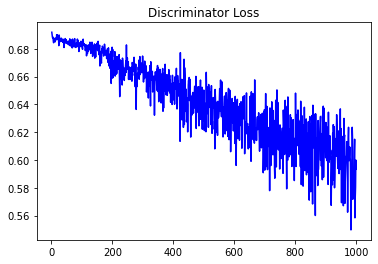

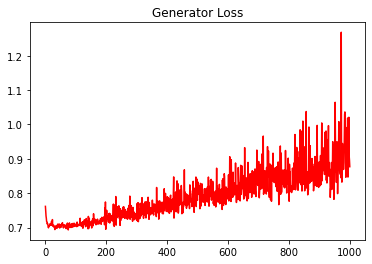

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5466155129857362


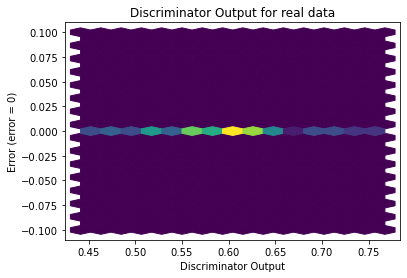

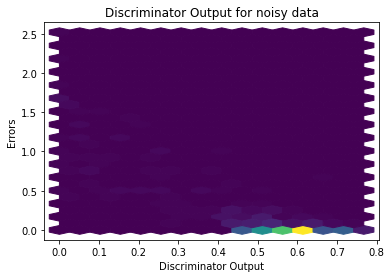

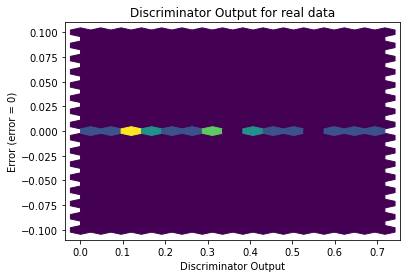

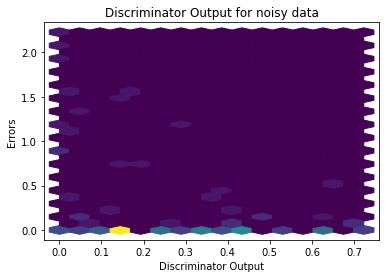

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


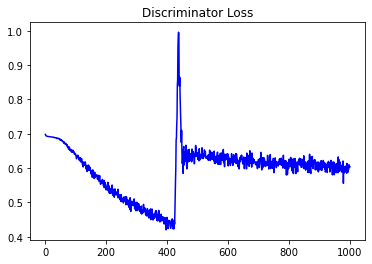

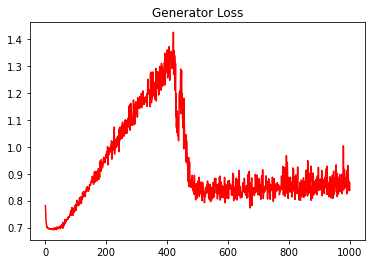

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5337585426643491


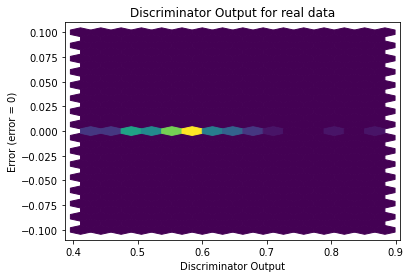

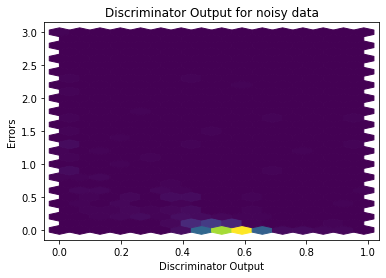

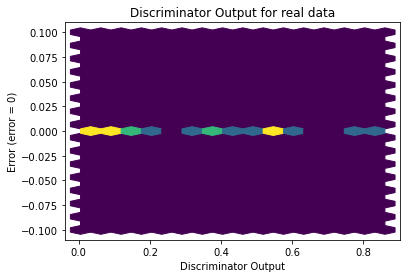

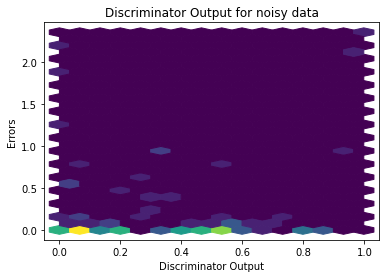

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1137]], requires_grad=True)
